In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt


In [2]:
#NISTOR Iarina 21210925

In [3]:
dt = pd.read_csv('confiserie.csv',header=None)
dt

,0,1,2
0,Australia,17.3,327.4
1,Austria,7.7,179.5
2,Belgium,10.4,279.4
3,Denmark,5.1,139.1
4,Finland,5.0,92.5
5,France,56.9,926.7
6,Germany,79.7,2186.3
7,Ireland,3.5,96.8
8,Italy,57.8,523.9
9,Japan,124.0,935.9


In [4]:
data = dt.to_numpy()
data

array([['Australia', 17.3, 327.4],
       ['Austria', 7.7, 179.5],
       ['Belgium', 10.4, 279.4],
       ['Denmark', 5.1, 139.1],
       ['Finland', 5.0, 92.5],
       ['France', 56.9, 926.7],
       ['Germany', 79.7, 2186.3],
       ['Ireland', 3.5, 96.8],
       ['Italy', 57.8, 523.9],
       ['Japan', 124.0, 935.9],
       ['Netherland', 15.1, 444.2],
       ['Norway', 4.3, 119.7],
       ['Spain', 39.0, 300.7],
       ['Sweden', 8.7, 201.9],
       ['Switzerland', 6.9, 194.7],
       ['United-Kingdom', 57.7, 1592.9],
       ['United-States', 252.7, 5142.2]], dtype=object)

In [5]:
x1 = data[:,1]
y1 = data[:,2]
x1,y1

(array([17.3, 7.7, 10.4, 5.1, 5.0, 56.9, 79.7, 3.5, 57.8, 124.0, 15.1, 4.3,
        39.0, 8.7, 6.9, 57.7, 252.7], dtype=object),
 array([327.4, 179.5, 279.4, 139.1, 92.5, 926.7, 2186.3, 96.8, 523.9,
        935.9, 444.2, 119.7, 300.7, 201.9, 194.7, 1592.9, 5142.2],
       dtype=object))

In [6]:
A=np.array([x1,np.ones(len(x1))])
#A = np.vstack([x1,np.ones(len(x1))]).T
m,c = np.linalg.lstsq(A.T.astype('float'),y1.astype('float'),rcond=None)[0]

In [7]:
def fig_nuage(x,y):
    return plt.scatter(x,y,s=75,color='pink')

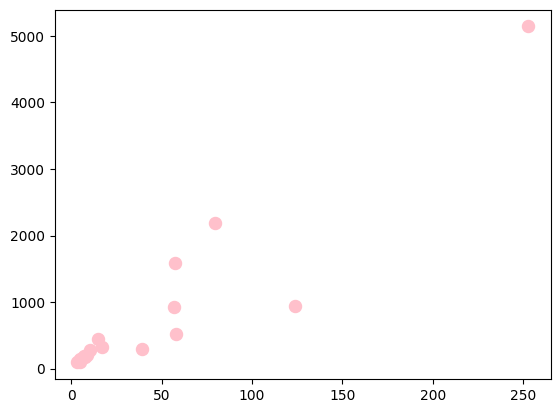

In [8]:
fig_nuage(x1,y1)

In [9]:
def cov(x,y):
    return (1 / len(x))*np.sum((x - np.mean(x))*(y - np.mean(y)))
    

In [10]:
cov(x1,y1)

70177.68989619377

In [11]:
def regression_mc(x, y):
    m = cov(x, y)/np.var(x)
    p = np.mean(y) - m*np.mean(x)
    return m, p

In [12]:
def fig_regression(x,y):
    a = regression_mc(x,y)[1]
    b = regression_mc(x,y)[0]
    return plt.plot(x,a+b*x,color='red') and fig_nuage(x,y)
    

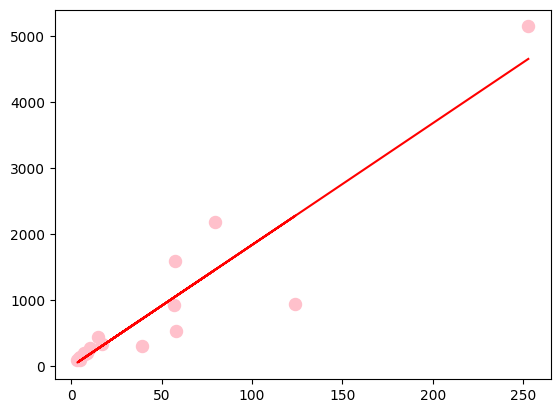

In [13]:

fig_regression(x1,y1)

In [14]:
#2eme mode de resolution

In [15]:
A=np.array([x1,np.ones(len(x1))])
#A = np.vstack([x1,np.ones(len(x1))]).T
m,c = np.linalg.lstsq(A.T.astype('float'),y1.astype('float'),rcond=None)[0]

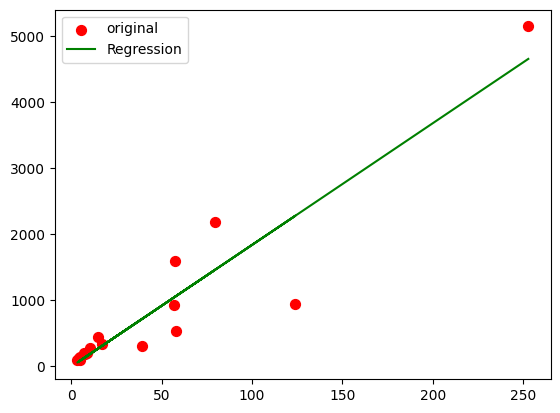

In [16]:
plt.scatter(x1,y1,s=50,color="red",label="original")
plt.plot(x1,m*x1+c,color="green",label="Regression")
plt.legend()

In [17]:
#Le modele lineaire semble appropie

In [18]:
#le nuage de points se rapproche de la droite de regression

In [19]:
#estimation de la consommation de confiserie pour le Bresil
regression_mc(x1,y1)[1] + regression_mc(x1,y1)[0]*160

2940.8632397669353

In [20]:
def cor(x,y):
    return cov(x,y)/np.sqrt(np.var(x)*np.var(y))

In [21]:
#le coefficient de correlation
cor(x1,y1)
#il confirme les observations visuelles

0.9310645268383964

In [22]:
#ici, parce que c'est une regression lineaire simple, 
#on a le coefficient de determination R = |r|
#R**2 = 
cor(x1,y1)**2
#il confirme les observations visuelles

0.8668811531368069

In [23]:
def residus_normalises(x,y):
    a = regression_mc(x,y)[1]
    b = regression_mc(x,y)[0]
    sr = len(x)*(np.var(x)*np.var(y)-cov(x,y)**2)/np.var(x)
    return (y-a-b*x)/(np.sqrt(sr/(len(x)-2)))

In [24]:
residus_normalises(x1,y1)

array([0.04039904758577502, 0.10193132723443979, 0.20745121025594102,
       0.11787214951365024, 0.023587574018633827, -0.23614738118038817,
       1.5312869280944001, 0.09094468518606166, -1.1196958084107187,
       -2.8246477703926893, 0.3719632113546402, 0.10809510162582235,
       -0.8592327589075966, 0.1102552851453459, 0.16504529417429076,
       1.1362281751046264, 1.0346637295977625], dtype=object)

In [25]:
maxi=np.max(np.abs(residus_normalises(x1,y1)))
ind=0
ret=0
for x in residus_normalises(x1,y1):
    if ((x==maxi) | (x==-maxi)):
            ret=ind
    ind=ind+1      
ret
data[ret]

array(['Japan', 124.0, 935.9], dtype=object)

In [26]:
#dans ce graph, on peut voir qu'il existe un point qui est plus loin
#et qui n'est pas entre -2 et 2
#dessus, j'ai essaye de trouver son index et j'ai decouvert c'est Japan
#Je suppose que si j'efface Japane le coefficient de correlation se 
#va ameliorer

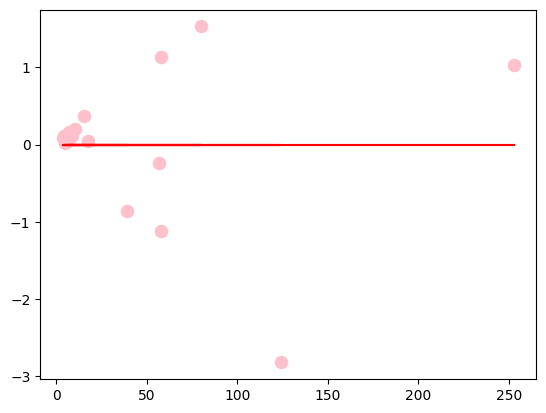

In [27]:
fig_regression(x1,residus_normalises(x1,y1))

In [28]:
#essaye sans Japan

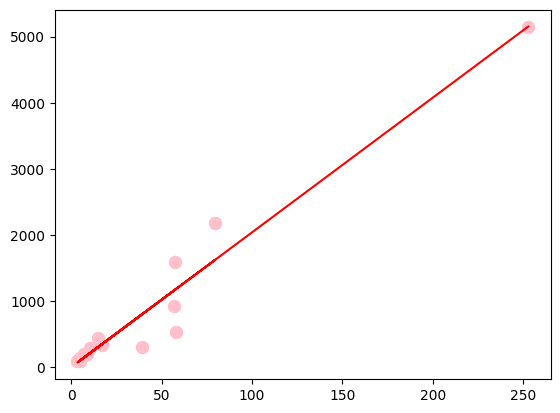

In [29]:
dataJ=dt.drop(9).to_numpy()
x1J = dataJ[:,1]
y1J = dataJ[:,2]
fig_regression(x1J,y1J)

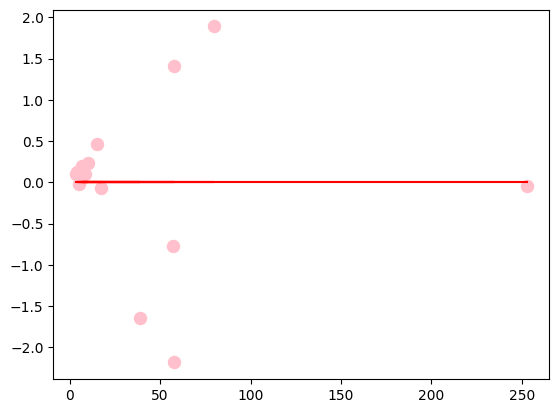

In [30]:
fig_regression(x1J,residus_normalises(x1J,y1J))

In [31]:
cor(x1J,y1J)**2

0.9508640349799405

In [32]:
#exerxice 2

In [33]:
d2 = pd.read_csv('reactions.csv',header=None)

In [34]:
data2 = d2.to_numpy()
data2

array([['exp1', 0.1, 0.9],
       ['exp2', 0.3, 0.92],
       ['exp3', 0.7, 0.95],
       ['exp4', 1.0, 0.965],
       ['exp5', 1.5, 0.97],
       ['exp6', 2.0, 0.98]], dtype=object)

In [35]:
x2=data2[:,1]
y2=data2[:,2]
x2,y2

(array([0.1, 0.3, 0.7, 1.0, 1.5, 2.0], dtype=object),
 array([0.9, 0.92, 0.95, 0.965, 0.97, 0.98], dtype=object))

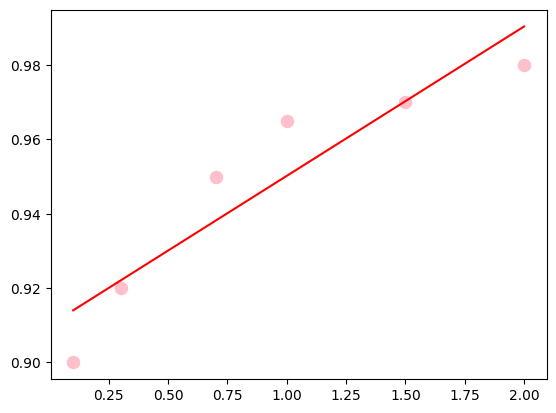

In [36]:
fig_regression(x2,y2)

In [37]:
b,a=regression_mc(x2,y2)
residus=y2-x2*b-a
data_epsi = np.array([y2,a+b*x2,residus,residus_normalises(x2,y2)])
epsi_df = pd.DataFrame(data_epsi.transpose(),columns=['y','y*','residu','residu normalise'])
epsi_df

,y,y*,residu,residu normalise
0,0.9,0.914018,-0.014018,-1.084126
1,0.92,0.922054,-0.002054,-0.158821
2,0.95,0.938125,0.011875,0.9184
3,0.965,0.950179,0.014821,1.146273
4,0.97,0.970268,-0.000268,-0.020716
5,0.98,0.990357,-0.010357,-0.80101


In [38]:
#Un modele quadratique semblerait plus approprie

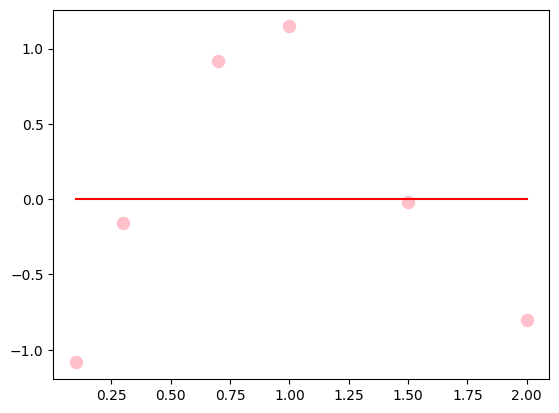

In [39]:
fig_regression(x2,residus_normalises(x2,y2))

In [40]:
#les residus ont un tendance croissant, puis decroissant

In [41]:
#p* = ln(p/1-p)
#a+bt=p*

In [42]:
y22 = np.log(np.array(y2/(1-y2), dtype=int)) #ca marche pas sans dtype=int, il peut modifier un peu les donnees

In [43]:
y22

array([2.19722458, 2.39789527, 2.89037176, 3.29583687, 3.4657359 ,
       3.87120101])

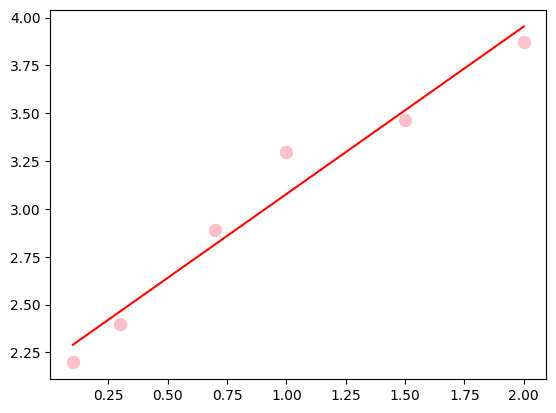

In [44]:
fig_regression(x2,y22)

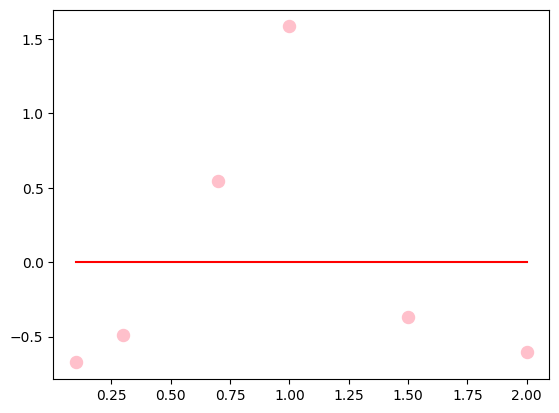

In [45]:
fig_regression(x2,residus_normalises(x2,y22))